<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [1]:
import pandas as pd
import re

yelp = pd.read_json('./data/review_sample.json', lines=True)

In [2]:
print(yelp.shape, '\n')
yelp.head()

(10000, 9) 



,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


In [3]:
yelp['text'].head()

0    BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...
1    Came here for lunch Togo. Service was quick. S...
2    I've been to Vegas dozens of times and had nev...
3    We went here on a night where they closed off ...
4    3.5 to 4 stars\n\nNot bad for the price, $12.9...
Name: text, dtype: object

In [4]:
# removing \n and extra space from the data
yelp['text'] = yelp['text'].apply(lambda x : re.sub(r'\\n', "", x))

## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [5]:
# imports to clean and tokenize dataset
import spacy 
import numpy as np
from spacy.tokenizer import Tokenizer
import re

import seaborn as sns

In [6]:
# Instantiating NLP and the Tokenizer
nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [7]:
# difining a tokenization function
def tokenize(doc):
    STOP_WORDS = ['$','food','good','great', 'place', 've', 'got', 'want', 'wasn',
                  'came', 'service', 'like', 'come', 'went', 'said', 'ordered']
    
    '''Instantiating nlp to learn the document'''
    doc = nlp(doc)
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True) \
           and (token.pos != 'PRON') and (token.is_space == False) and (token.is_digit == False) and (token.text.lower() not in STOP_WORDS)]

In [8]:
# applying tokenizer
yelp['tokens'] = yelp['text'].apply(tokenize)

<AxesSubplot:>

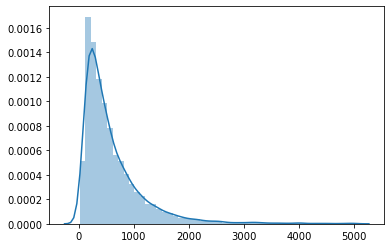

In [9]:
doc_len = [len(doc) for doc in yelp['text']]
sns.distplot(doc_len)

In [10]:
yelp['tokens'].head(10)

0    [beware, fake, fake, fake, small, business, Lo...
1    [lunch, Togo, quick, staff, friendly, complain...
2    [Vegas, dozen, time, step, foot, Circus, Circu...
3    [night, close, street, party, good, actually, ...
4    [3.5, star, bad, price, 12.99, lunch, senior, ...
5    [tasty, fast, casual, latin, street, menu, ove...
6    [absolutely, amazing, incredible, production, ...
7    [Pho, enjoy, 9:00pm, busy, serve, right, away,...
8    [absolutely, unique, experience, nail, shop, f...
9    [wow, walk, sit, bar, minute, bartender, work,...
Name: tokens, dtype: object

In [11]:
yelp.head(1)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,tokens
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w,"[beware, fake, fake, fake, small, business, Lo..."


## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [12]:
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
# Tunning Parameters

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', 
                        ngram_range=(1,2),
                        max_df= 0.5, # max data frequency
                        min_df= 3,  # min data frequancy
                        tokenizer=tokenize,
                        max_features = 5000)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(yelp['text'])


# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
print(dtm.shape, '\n')
dtm.head()

(10000, 5000) 



,+,+ year,-PRON-,-the,1.5,1.50,1/2,1/2 hour,1/4,10/10,...,yup,z,zero,zero star,zone,zoo,zucchini,~,à,était
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Calculate Distance of TF-IDF Vectors
from sklearn.metrics.pairwise import cosine_similarity

dist_matrix  = cosine_similarity(dtm)

In [15]:
# Turn it into a DataFrame
df = pd.DataFrame(dist_matrix)
print(df.shape, '\n')
df.head()

(10000, 10000) 



,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1.000000,0.000000,0.017007,0.000000,0.005504,0.022682,0.002975,0.000000,0.002697,0.019357,...,0.000000,0.000000,0.004398,0.022724,0.006670,0.048361,0.000000,0.012361,0.005234,0.035867
1,0.000000,1.000000,0.046219,0.000000,0.060944,0.038910,0.000000,0.000000,0.000000,0.000000,...,0.019331,0.027330,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008371
2,0.017007,0.046219,1.000000,0.018009,0.014860,0.009513,0.029036,0.000000,0.030168,0.033347,...,0.029388,0.043488,0.000000,0.037268,0.015552,0.021093,0.003290,0.008024,0.013036,0.100651
3,0.000000,0.000000,0.018009,1.000000,0.018976,0.058933,0.019451,0.000000,0.019421,0.000000,...,0.000000,0.000000,0.017808,0.000000,0.000000,0.136344,0.000000,0.000000,0.000000,0.105617
4,0.005504,0.060944,0.014860,0.018976,1.000000,0.043882,0.000000,0.042813,0.012591,0.081586,...,0.013209,0.011933,0.022541,0.000000,0.133332,0.000000,0.021876,0.044227,0.007821,0.050101


In [16]:
# Fit DTM to NearestNeighbor
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [17]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 1.        , 1.        , 1.15975804, 1.21791624]]),
 array([[   0, 6204, 6311, 2131, 6132]], dtype=int64))

In [18]:
# Query Using kneighbors 
nn.kneighbors([dtm.iloc[10]])

(array([[0.        , 1.        , 1.        , 1.21226135, 1.21919513]]),
 array([[  10, 6204, 6311, 5531, 3048]], dtype=int64))

In [19]:
yelp['text'][10]

"We popped in for dinner yesterday with no reservation, and despite the place being packed, the staff still managed to find us a table for two. The inside is cozy: exposed brick, fairy lights, and big red leather chairs. \n\nTHE GOOD:\n- Fresh bread while waiting for our food - yum!\n- We had the charcuterie board as our starter, which came with pears, walnuts, olives, and a side of honey to drizzle over everything. This was delicious - my favourite was the blue cheese, which was strong but not overly pungent. \n- The star of the show was my entrée: the pear and gorgonzola pizza. It took me forever to decide on what to order - there are so many amazing pizza and pasta choices - but this did not disappoint. It had a thin crust, a very generous amount of cheese, and the pears added a really nice sweetness. They serve it with a pizza cutter, so you can cut the slices to your liking - I thought that was a nice touch (even though I was terrible at cutting it neatly). \n- We were in good han

In [20]:
# fake review for testing
fake_review = ['''
Today was a very nice sunny day in the south side of Spain.
It looks like the perfect weather to go to the beach or hit
the pool. Sounds like a very good plan for this 3 days long
weekend.
''']

# Query for Sim of Random doc to yelp
new = tfidf.transform(fake_review)

In [21]:
# looking at the arrays for queries requests
nn.kneighbors(new.todense())

(array([[1.        , 1.        , 1.19185108, 1.20921962, 1.23372376]]),
 array([[6204, 6311, 6392, 8590, 3227]], dtype=int64))

In [23]:
yelp['text']

0       BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...
1       Came here for lunch Togo. Service was quick. S...
2       I've been to Vegas dozens of times and had nev...
3       We went here on a night where they closed off ...
4       3.5 to 4 stars\n\nNot bad for the price, $12.9...
                              ...                        
9995    My family and I were hungry and this Subway is...
9996    My wife and I came here with a a couple of fri...
9997    The food was just OK and not anything to brag ...
9998    Today's visit is great!! Love and enjoy Town S...
9999    This is the absolute worst place I have ever s...
Name: text, Length: 10000, dtype: object

In [24]:
yelp['text'][4900]

'HORRIBLE IS ALL I CAN SAY.. I am from MIAMI where wet willies is originally from on south beach. The vibe at the Charlotte Wet Willies is awful the drinks taste nothing like the way south beach wet willies taste. \n\nI would not recommend to anybody the place is an embarassing to have the Wet Willies name'

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [25]:
# Import Statements
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer


In [26]:
# Difining pipe components
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
clf = RandomForestClassifier()

pipe = Pipeline([('vect', vect), ('clf', clf)])


# lsi = Pipeline([('vect', vect), ('svd', svd)])
# vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
# # clf = RandomForestClassifier()
# pipe = Pipeline([('lsi', lsi), ('clf', clf)])

In [27]:
import warnings # ignoring warnings for visualization
warnings.filterwarnings('ignore')
# train-test-split import
from sklearn.model_selection import train_test_split
# instantiating variables to columns
X = yelp['text']
y = yelp['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,
                                                   stratify=y)

pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_patte...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [28]:
# Start rating prediction review from fake review
print('Star Rating of (fake_review): ', pipe.predict(fake_review))

Star Rating of (fake_review):  [5]


In [29]:
# looking at the accuracy score
from sklearn.metrics import accuracy_score

accuracy_score(pipe.predict(X_test), y_test)

0.5281818181818182

In [30]:
# Parameters to fit on the pipeline
parameters = {
    'vect__max_df': (0.75, 1.0),
    'vect__min_df': (0.02, 0.05),
    'clf__max_depth':(5,10,15,20),
    'clf__n_estimators':(5, 10,)
}

In [31]:
# Fitting the pipeline into GridSearchCV
grid_search = GridSearchCV(pipe,parameters, cv=5, n_jobs=2, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=2)]: Done 160 out of 160 | elapsed:  3.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 2),
                                                        no

In [32]:
# the best estimator accuracy score
accuracy_score(grid_search.best_estimator_.predict(X_test), y_test)

0.5318181818181819

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Keep the `iterations` parameter at or below 5 to reduce run time
    - The `workers` parameter should match the number of physical cores on your machine.
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [33]:
# imports for topic models
from gensim.models import LdaMulticore
from gensim.corpora import Dictionary
import gensim
from gensim import corpora

Learn the vocubalary of the yelp data:

In [34]:
# Dictionary representation of topics
id2word = corpora.Dictionary(yelp['tokens'])

In [35]:
# count of the word 'fake'
id2word.token2id['fake']

11

In [36]:
# filtering parameters for corpus
id2word.filter_extremes(no_below=4, no_above=0.85)

Create a bag of words representation of the entire corpus

In [37]:
# creating a corpus of the tokenized topics
corpus = [id2word.doc2bow(text) for text in yelp['tokens']]

In [38]:
corpus[812]

[(18, 1),
 (31, 1),
 (65, 1),
 (131, 1),
 (153, 1),
 (230, 1),
 (257, 2),
 (325, 1),
 (326, 1),
 (442, 1),
 (452, 1),
 (477, 1),
 (714, 1),
 (840, 1),
 (1009, 1),
 (1026, 1),
 (1096, 1),
 (1108, 1),
 (1161, 1),
 (1284, 1),
 (1285, 1),
 (1492, 1),
 (1612, 1),
 (2054, 1),
 (2698, 1),
 (4776, 1),
 (4777, 1),
 (4778, 1)]

In [39]:
id2word[77]

'nice'

Your LDA model should be ready for estimation: 

In [40]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   iterations=5,
                   workers=4,
                   num_topics = 10
                  )

In [41]:
lda.print_topics()

[(0,
  '0.009*"time" + 0.007*"try" + 0.006*"restaurant" + 0.005*"order" + 0.005*"love" + 0.005*"eat" + 0.005*"little" + 0.005*"good" + 0.005*"ask" + 0.005*"nice"'),
 (1,
  '0.007*"time" + 0.007*"try" + 0.005*"price" + 0.005*"staff" + 0.005*"love" + 0.004*"tell" + 0.004*"take" + 0.004*"order" + 0.004*"find" + 0.004*"go"'),
 (2,
  '0.014*"time" + 0.008*"try" + 0.006*"love" + 0.006*"order" + 0.006*"look" + 0.005*"good" + 0.005*"experience" + 0.005*"tell" + 0.005*"price" + 0.004*"definitely"'),
 (3,
  '0.009*"time" + 0.007*"try" + 0.007*"love" + 0.006*"wait" + 0.006*"nice" + 0.005*"restaurant" + 0.005*"order" + 0.005*"price" + 0.004*"think" + 0.004*"amazing"'),
 (4,
  '0.016*"time" + 0.006*"try" + 0.005*"love" + 0.005*"look" + 0.005*"know" + 0.005*"good" + 0.005*"go" + 0.004*"recommend" + 0.004*"need" + 0.004*"work"'),
 (5,
  '0.009*"time" + 0.006*"try" + 0.005*"love" + 0.005*"look" + 0.005*"staff" + 0.005*"order" + 0.005*"restaurant" + 0.005*"day" + 0.004*"ask" + 0.004*"take"'),
 (6,
  '0

Create 1-2 visualizations of the results

In [42]:
# removing extra',*,^ and "" from our topics
words = [re.findall(r'"[^"]*"', t[1]) for t in lda.print_topics(20)]

In [43]:
# joining topics and separatuing with ,
topic_labels = [', '.join(t[0:5]) for t in words]

In [44]:
for id, t in enumerate(topic_labels): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
"time", "try", "restaurant", "order", "love"

------ Topic 1 ------
"time", "try", "price", "staff", "love"

------ Topic 2 ------
"time", "try", "love", "order", "look"

------ Topic 3 ------
"time", "try", "love", "wait", "nice"

------ Topic 4 ------
"time", "try", "love", "look", "know"

------ Topic 5 ------
"time", "try", "love", "look", "staff"

------ Topic 6 ------
"time", "try", "look", "wait", "love"

------ Topic 7 ------
"love", "nice", "time", "look", "order"

------ Topic 8 ------
"time", "eat", "price", "tell", "restaurant"

------ Topic 9 ------
"time", "try", "nice", "recommend", "know"



In [45]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [46]:
#cheating topics label visualization
pyLDAvis.gensim.prepare(lda, corpus, id2word)

C:\Users\lomopa\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.004063  0.001560       1        1  10.417083
0      0.002745  0.003966       2        1  10.236128
2     -0.005166 -0.003602       3        1  10.187053
5     -0.000531  0.001038       4        1  10.166580
3      0.000729 -0.001718       5        1   9.982843
6     -0.002596  0.000409       6        1   9.982380
8      0.000369  0.003665       7        1   9.880726
9      0.001219  0.001915       8        1   9.842485
7      0.002912 -0.005249       9        1   9.798765
1      0.004382 -0.001983      10        1   9.505958, topic_info=           Term         Freq        Total Category  logprob  loglift
29         time  4247.000000  4247.000000  Default  30.0000  30.0000
121         eat  1545.000000  1545.000000  Default  29.0000  29.0000
77         nice  1803.000000  1803.000000  Default  28.0000  28.0000
357         ask  1504.000000  1504.000000  Default  27.0000  27.0000
31         wait  1679.000000  1679.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
86   restaurant   143.905113  1678.526839  Topic10  -5.6102  -0.1033
18         look   158.025584  1962.231345  Topic10  -5.5166  -0.1658
77         nice   139.823515  1803.700083  Topic10  -5.6389  -0.2040
115         bad   116.529154  1237.177104  Topic10  -5.8212  -0.0092
298  definitely   113.782547  1441.517090  Topic10  -5.8450  -0.1859

[872 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
6869      1  0.168904    -1
6869      3  0.168904    -1
6869      5  0.168904    -1
6869      7  0.168904    -1
6869      9  0.168904    -1
...     ...       ...   ...
4530      7  0.073637   zoo
4530      8  0.073637   zoo
4530      9  0.073637   zoo
4530     10  0.073637   zoo
4259      7  0.268136  zoom

[4755 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 3, 6, 4, 7, 9, 10, 8, 2])

C:\Users\lomopa\anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


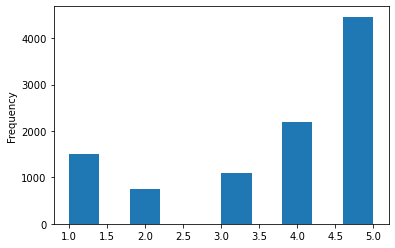

In [47]:
yelp['stars'].plot(kind='hist');

The reviews of food in the las vegas area are overall very positive through yelp. As you can see from the LDAvis there is a large variety of options as well besides the most popular reviews focusing on food. People have high recommendations of places and little use of negative words, long wait times, and words such as best, love, and amazing standing out in every document. However, most people when reviewing leave very similar phrases in regards to positive reviews and usually add more details only on the extreme positive and negative reviews. Besides reviews of the experiences, it is also shown that location/delivery are important aspects as well.

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Create more visualizations of the LDA results and provide written analysis
* Incorporate RandomizedSearchCV into docoument classification pipeline
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)